In [1]:
#importing libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('data.csv',encoding='latin1')
df = dataset.copy()


C:\Users\Akshay\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()  

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [7]:
df.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [9]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [10]:
df['agency'].value_counts()

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

In [11]:
df['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [12]:
#deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
#deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

In [13]:
df.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                                0
so2                                 0
no2                              1981
rspm                            29643
spm                            228178
location_monitoring_station     20567
pm2_5                          386966
date                                4
dtype: int64

In [14]:
#not interested in agency
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

In [15]:
#dataset after deleting the above columns
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [16]:
#changing type to only 3 categories
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df['type'].value_counts()

Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

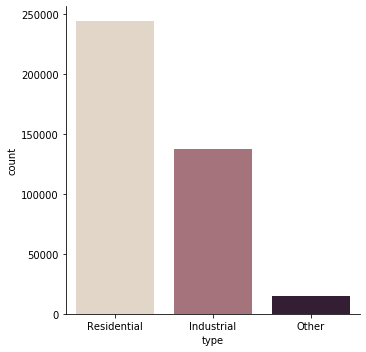

In [17]:
#how many observations belong to each location
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)

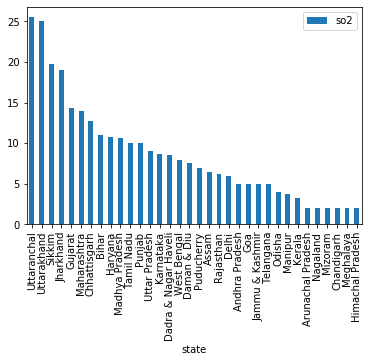

In [18]:
#bar plot of so2 vs state - desc order
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()

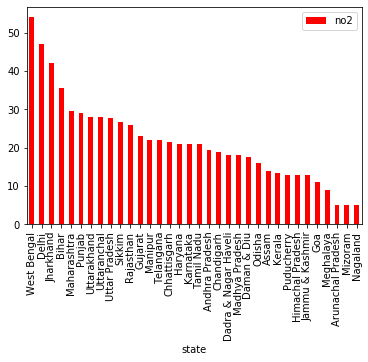

In [19]:
# bar plot of no2 vs state - desc order
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'r')

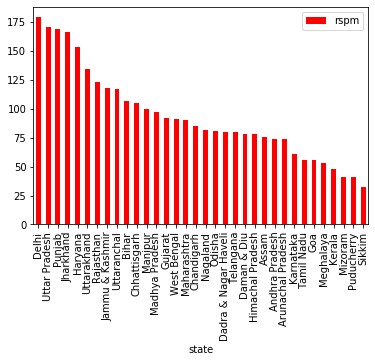

In [20]:
# rspm = PM10
df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')

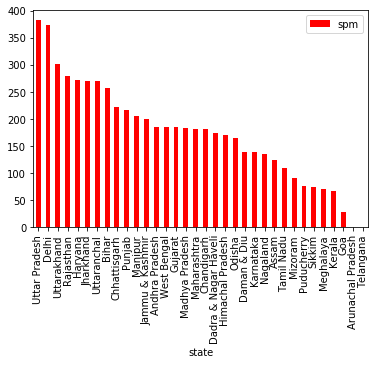

In [21]:
# spm
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r')

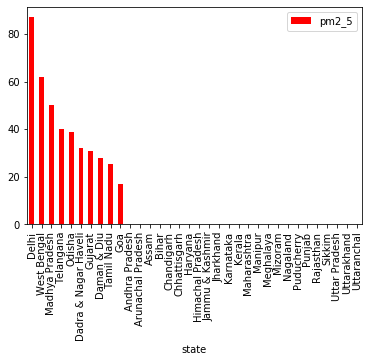

In [22]:
# spm
df[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'r')

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


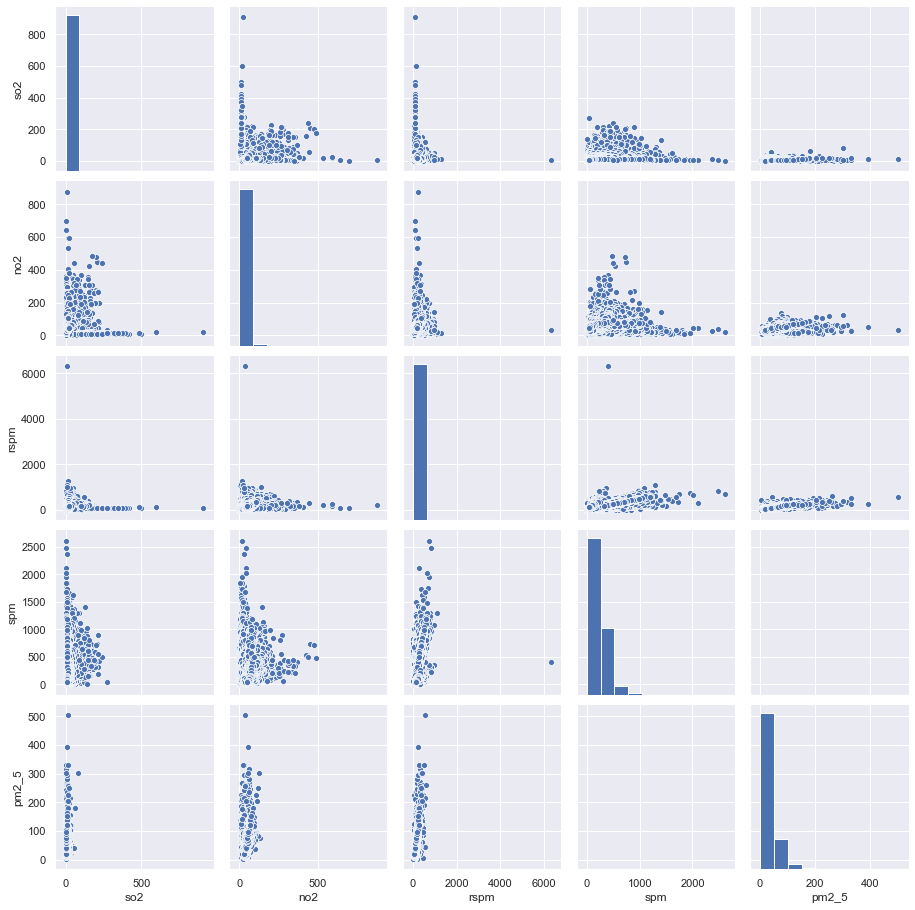

In [23]:
#Scatter plots of all columns
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(df[cols], size = 2.5)
plt.show()

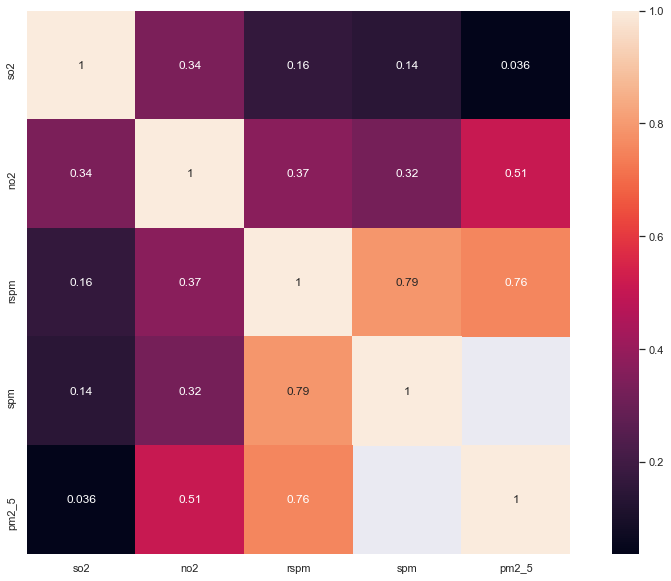

In [24]:
#Correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)

In [52]:
# Creating an year column
df['date'] = pd.to_datetime(df['date'], format = '%Y/%m/%d')
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]


In [53]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


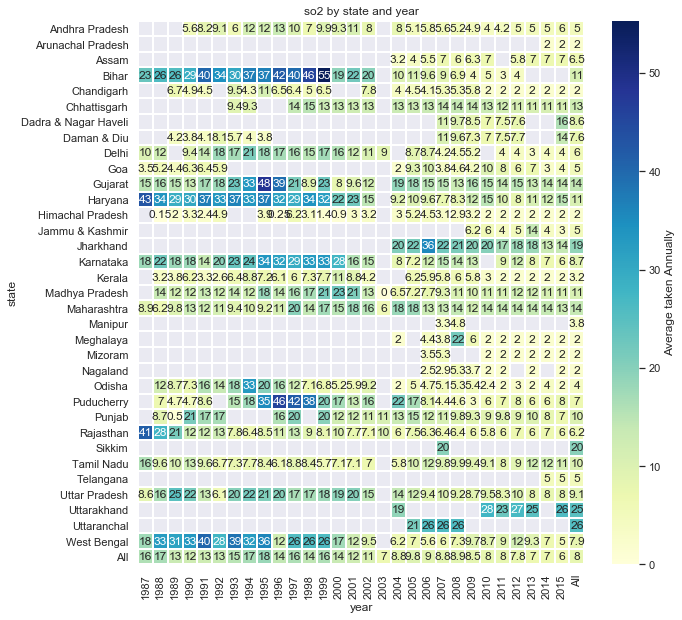

In [54]:
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(df.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

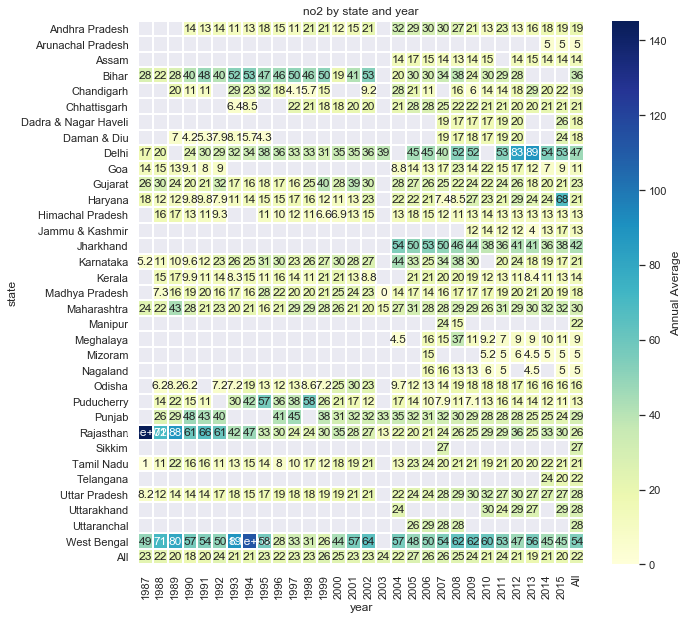

In [55]:
# Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})


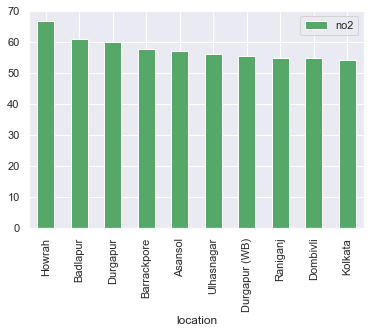

In [57]:
# bar plot of no2 vs location - desc order - first 10
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(10).plot.bar(color = 'g')


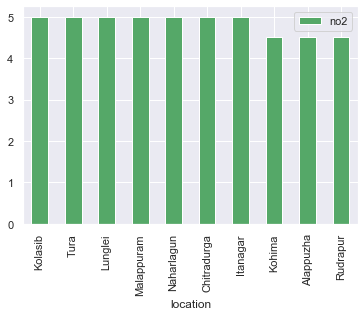

In [58]:
# bar plot of no2 vs location - desc order - last 10
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(10).plot.bar(color = 'g')


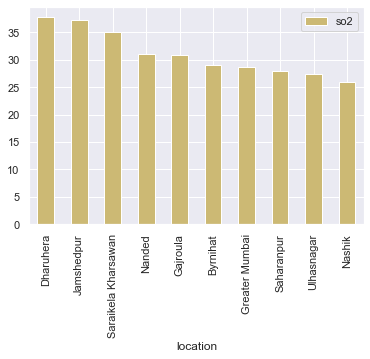

In [59]:
# bar plot of so2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(10).plot.bar(color = 'y')

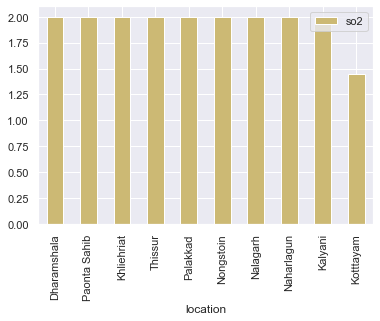

In [61]:
# bar plot of no2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(10).plot.bar(color = 'y')

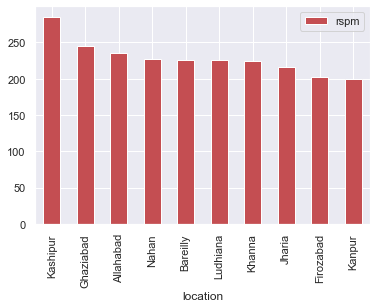

In [73]:
# rspm = PM10 - location wise - first 10
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(10).plot.bar(color = 'r')

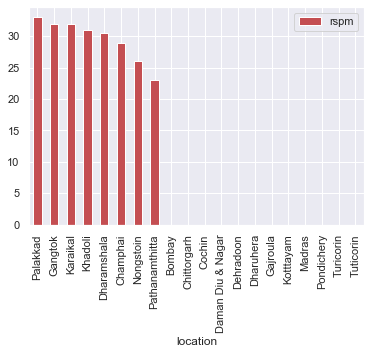

In [72]:
# rspm = PM10 - location wise - last 20
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).tail(20).plot.bar(color = 'r')

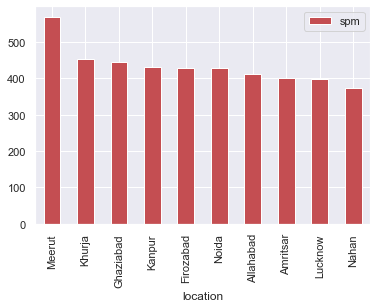

In [69]:
# spm = PM10 - location wise - first 10
df[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending = False).head(10).plot.bar(color = 'r')

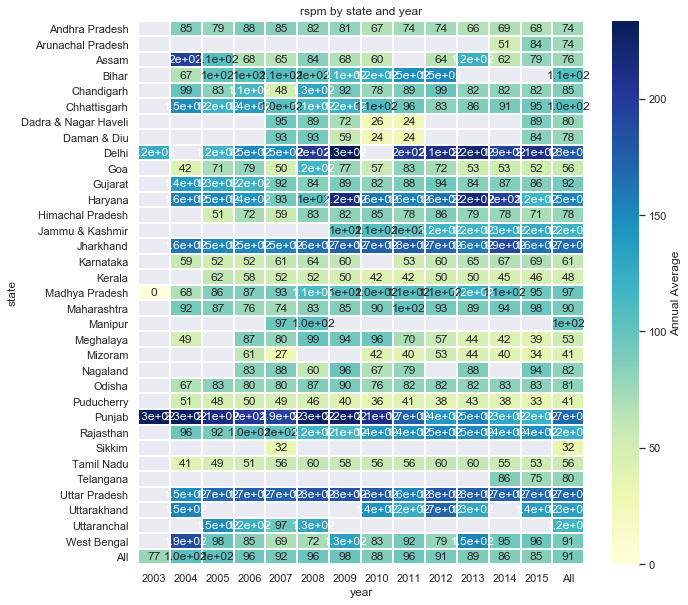

In [66]:
# heatmap of rspm
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(df.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})


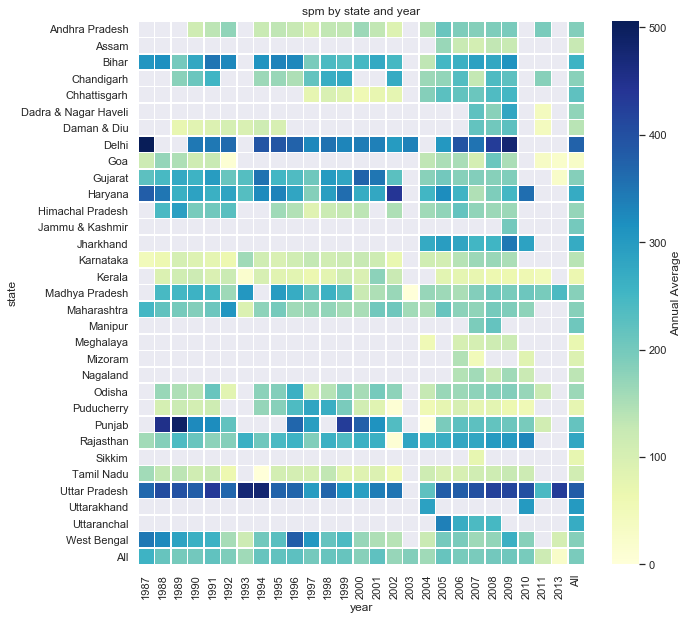

In [67]:
# heatmap of spm
f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(df.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True)
                , cmap = "YlGnBu", linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})